In [1]:
# Nice notebook environment
%matplotlib inline
from IPython.display import display

# Importing numpy
import numpy as np
from numpy import *
from scipy.linalg import expm
from scipy import integrate
from scipy.optimize import curve_fit

# Importing matplotlib for graphics and fixing the default size of plots
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # para colores en las gráficas
import matplotlib.ticker

matplotlib.rcParams['mathtext.fontset']='cm'
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (10,8)

# In case we need sympy
from sympy import init_printing
init_printing(use_latex=True)
from sympy import *

import math
import scipy.integrate
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

import numba #Para que el programa vaya mas rapido
from tqdm import tqdm #Para sacar la barra de avance del programa

import tarfile   # para tratar los archivos .tar
import glob      # para buscar directorios

import pandas as pd

In [2]:
def fexp(x):
    return np.exp(-(x-1.5)*(x-1.5)/0.1)

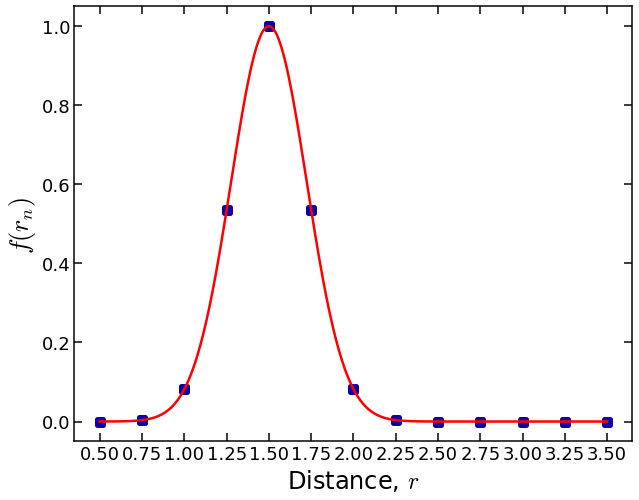

In [3]:
#representacion
fig, ax = plt.subplots()

# para leer los datos
sigma = 0.1
rij = 1.5
kint = 13

dist = np.linspace(0.5,3.5,kint)
fn = []


for i in range(0,kint):
    fn.append(np.exp(-(dist[i]-rij)*(dist[i]-rij)/sigma))

fn = np.array(fn,dtype=float)
# representar
# ax.errorbar(angulo, tau, yerr=error)

# ax.plot(angulo, tau, color = '#0B00A8', linewidth=2., label='')
ejex = np.linspace(0.5,3.5,500)
ax.plot(ejex, fexp(ejex), color = 'r', linewidth=2.5, label=r'$ f(r_n) = exp(-(r_n-r_{ij})^2/\sigma) $')
ax.scatter(dist, fn, color = '#0B00A8', marker ='s', linewidth=5., label='')

# popt, pcov = curve_fit(finv, angulo, tau)
# print(popt)
# ejex = np.linspace(0,3,100)
# ax.plot(ejex, finv(ejex, *popt), color = 'r', linewidth=2.5, label=r'$ f(x) = 32.18 x^{-0.47}$')

# diseño
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.5, length=8)

# ax.set_ylabel(r'$\phi(t=50)$ ', fontdict = {'fontsize':26, 'color':'k'})
ax.set_ylabel(r'$f(r_n)$ ', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'Distance, $r$', fontdict = {'fontsize':24, 'color':'k'})

# ax.set_xlim([0,120])
# ax.set_ylim([0,0.4])
ax.set_xticks([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0,3.25, 3.5])   


# plt.legend(bbox_to_anchor=(0.3,0.85), loc='upper left', fontsize=19, borderaxespad=0.)
# plt.text(20, 0.2, r'$ f(x) = 0.35 exp(-x/19.79) + 0.004$', fontsize=20)

plt.show()
# plt.savefig('ExponencialTFM.png',bbox_inches='tight')

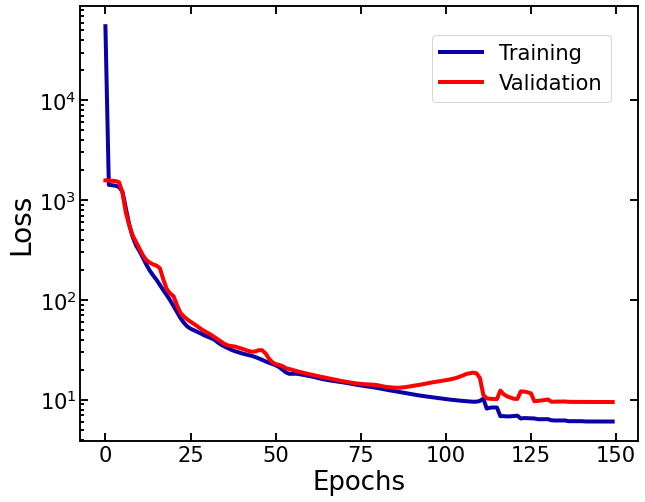

In [4]:
#representacion
fig, ax = plt.subplots()

# para leer los datos
epoch = []
train = []
val = []

# filename = 'C:/Users/Portatil/Downloads/lossbueno.csv'
filename = 'C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/loss-2gcl-2fcl.csv'

data = pd.read_csv(filename, header=None)
ndata = np.shape(data)
# print(ndata)

for i in range (1, ndata[0]):
    
    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

# diseño
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.9, length=4.)


ax.set_ylabel(r'Loss', fontdict = {'fontsize':28, 'color':'k'})
ax.set_xlabel(r'Epochs', fontdict = {'fontsize':26, 'color':'k'})

ax.set_yscale("log")
# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.arange(1,10,1),numticks=1) #subs=(0.2,0.4,0.6,0.8),
# ax.yaxis.set_minor_locator(locmin)
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


# ax.set_xlim([0,112])
# ax.set_ylim([4,1e4])
ax.set_xticks(np.arange(0,151,25))  
# ax.set_yticks([10,100,1000])   


plt.legend(bbox_to_anchor=(0.63,0.935), loc='upper left', fontsize=21, borderaxespad=0.)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)

plt.show()
# plt.savefig('Training_log.pdf',bbox_inches='tight')

MAE, Mean Absolute Error =  0.166993625164032
MRE, Mean Relative Error =  0.0023086765341995734


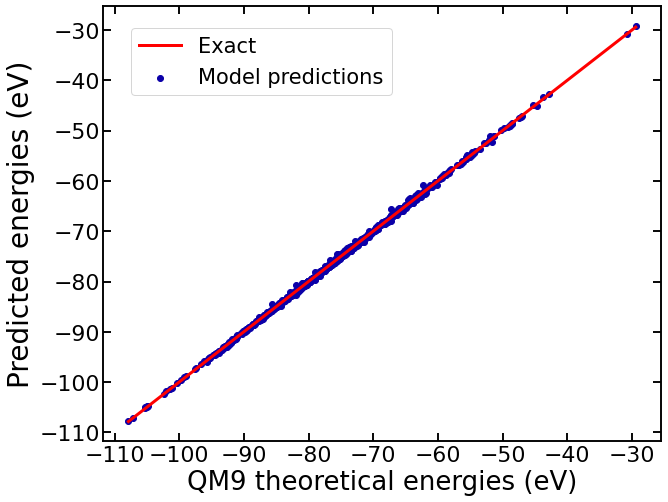

In [6]:
#representation
fig, ax = plt.subplots()

## data processing ##
p = []
e = []

filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/6nn-2gcl-2fcl-*prediction.csv')
# print(filename[0])

data = pd.read_csv(filename[0], header=None)
ndata = np.shape(data)
# print(ndata)
# print(data)

for i in range (1, ndata[0]):
    
    p.append(data[1][i])
    e.append(data[0][i])
    
prediction = np.array(p,dtype=float)
exact = np.array(e,dtype=float)

MAE = mae(exact, prediction)
print('MAE, Mean Absolute Error = ',MAE)
MRE = mape(exact, prediction)
print('MRE, Mean Relative Error = ',MRE)

eMax = np.max(exact)
eMin = np.min(exact)
x = np.linspace(eMin, eMax, 100)

ax.scatter(exact, prediction, color = '#0B00A8', label="Model predictions")
ax.plot(x, x, color = 'red', linewidth=3., label="Exact")

## design ##
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)

ax.set_ylabel(r'Predicted energies (eV)', fontdict = {'fontsize':28, 'color':'k'})
ax.set_xlabel(r'QM9 theoretical energies (eV)', fontdict = {'fontsize':26, 'color':'k'})

# ax.set_xlim([-110,-26])
# ax.set_ylim([-110,-26])
# ax.set_xticks(np.arange(1,6,1))  
# ax.set_xticks([0.0, 0.5, 1.0, 1.5, 2.0])   

plt.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', fontsize=21, borderaxespad=0.)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
# plt.text(20, 0.2, r'$ f(x) = 0.35 exp(-x/19.79) + 0.004$', fontsize=20)

# plt.show()
plt.savefig('Energy_test_results.pdf',bbox_inches='tight')

C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\1_loss-8node.csv
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\2_loss-10edge.csv
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\3_loss-5angle.csv
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\4_loss-5dihedral.csv


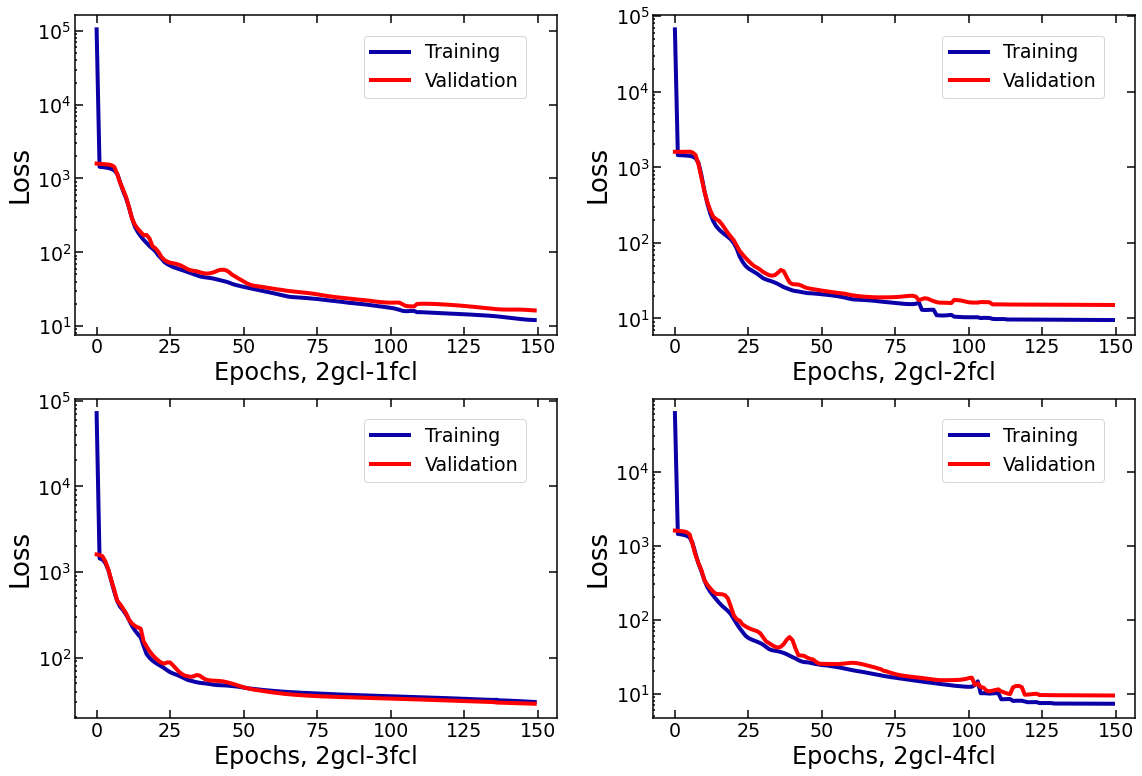

In [7]:
fig = plt.figure(figsize=(19,20))


# filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs_iniciales/loss-2gcl-*fcl.csv')
filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/*_loss*.csv')
# print(filename[0])
nfiles = len(filename)

for n in range(1,nfiles+1):

    index = '32' + repr(n)
    ax = fig.add_subplot(int(index))
    
    
    ## design ##
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.5, length=8)
    ax.tick_params(axis='y', which='minor', direction="in", width=1.5, length=2.)

    ax.set_ylabel(r'Loss', fontdict = {'fontsize':26, 'color':'k'})
    ax.set_xlabel(r'Epochs, 2gcl-' + repr(n) + 'fcl', fontdict = {'fontsize':24, 'color':'k'})

    ax.set_yscale("log")
#     locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.arange(1,10,1),numticks=1) #subs=(0.2,0.4,0.6,0.8),
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    ## data processing ##
    epoch = []
    train = []
    val = []
    
    
    data = pd.read_csv(filename[int(n-1)], header=None)
    ndata = np.shape(data)
    print(filename[int(n-1)])

    for i in range (1, ndata[0]):

        epoch.append(data[0][i])
        train.append(data[1][i])
        val.append(data[2][i])

    epoch = np.array(epoch,dtype=float)
    train = np.array(train,dtype=float)
    val = np.array(val,dtype=float)

    ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
    ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')
    
    plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=19, borderaxespad=0.)
    plt.xticks(fontsize = 19)
    plt.yticks(fontsize = 19)

plt.show()
# plt.savefig('Hiperparametros_5.pdf',bbox_inches='tight')

MAE (1,2)=  0.2069190526008606
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-1gcl-2fcl-10082022-111342prediction.csv
MAE (2,2)=  0.166993625164032
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-2gcl-2fcl-09082022-095637prediction.csv
MAE (3,2)=  0.19258174657821656
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-3gcl-2fcl-07082022-104057prediction.csv


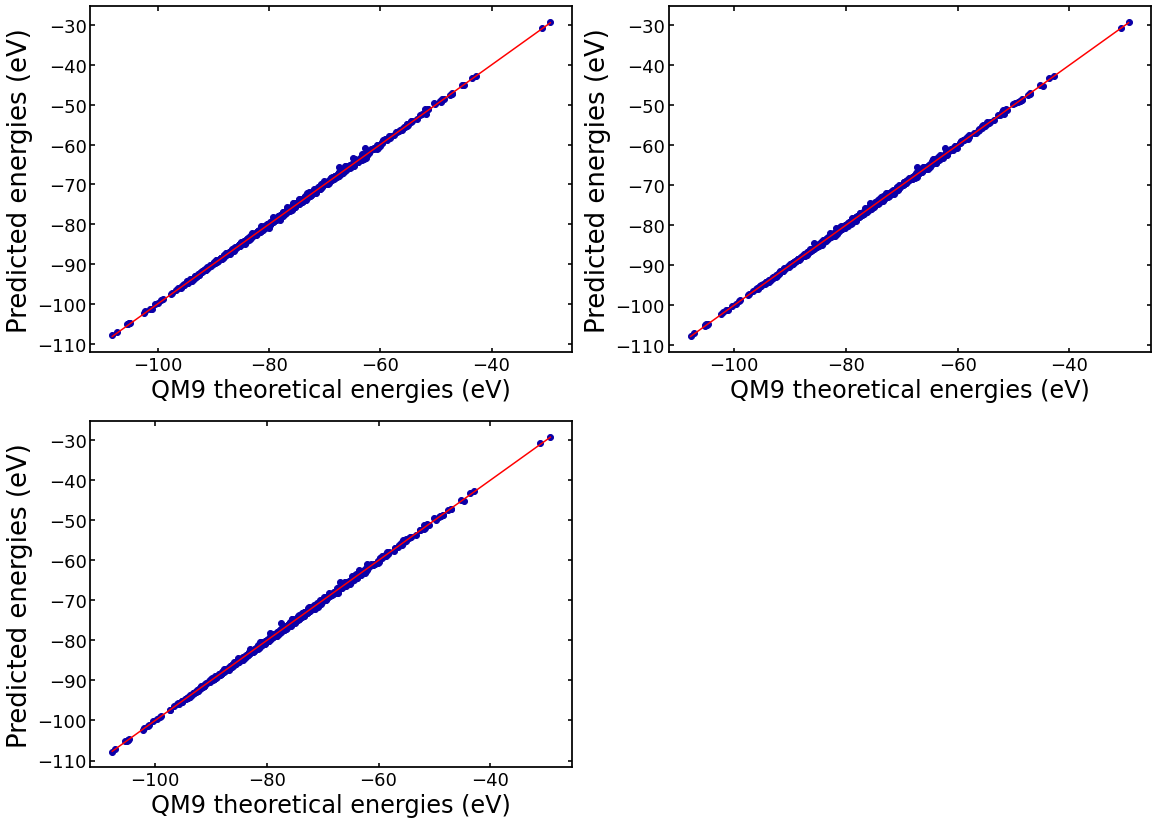

In [23]:
fig = plt.figure(figsize=(19,14))

filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/6nn-*gcl-2fcl-*prediction.csv')
# print(filename[0])
nfiles = len(filename)
# print(nfiles)
MAE = np.zeros(nfiles, dtype=float)

for n in range(1,1+nfiles):

    index = '22' + repr(n)
    ax = fig.add_subplot(int(index))

    #design
    ax.spines['left'].set_linewidth(1.75)
    ax.spines['right'].set_linewidth(1.75)
    ax.spines['top'].set_linewidth(1.75)
    ax.spines['bottom'].set_linewidth(1.75)

    ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.6, length=4.5)

    ax.set_ylabel(r'Predicted energies (eV)', fontdict = {'fontsize':26, 'color':'k'})
    ax.set_xlabel(r'QM9 theoretical energies (eV)', fontdict = {'fontsize':24, 'color':'k'})

    ## data processing ##
    p = []
    e = []
    
    data = pd.read_csv(filename[int(n-1)], header=None)
    ndata = np.shape(data)

    for i in range (1, ndata[0]):

        p.append(data[1][i])
        e.append(data[0][i])

    prediction = np.array(p,dtype=float)
    exact = np.array(e,dtype=float)

    eMax = np.max(exact)
    eMin = np.min(exact)
    x = np.linspace(eMin, eMax, 100)

    ax.scatter(exact, prediction, color = '#0B00A8', label="Model predictions")
    ax.plot(x, x, color = 'red', label="Exact")
    
    MAE[n-1] = mae(exact, prediction)
    print('MAE (' + repr(n) + ',2)= ', MAE[n-1])
    print(filename[int(n-1)])
    
plt.show()
# plt.savefig('fig_prediction_fcl_def.pdf',bbox_inches='tight')

MAE2 (2, 1)=  0.1788747477531433
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-2gcl-1fcl-14082022-102533prediction.csv
MAE2 (2, 2)=  0.166993625164032
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-2gcl-2fcl-09082022-095637prediction.csv
MAE2 (2, 3)=  0.2897661590576172
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-2gcl-3fcl-16082022-045559prediction.csv


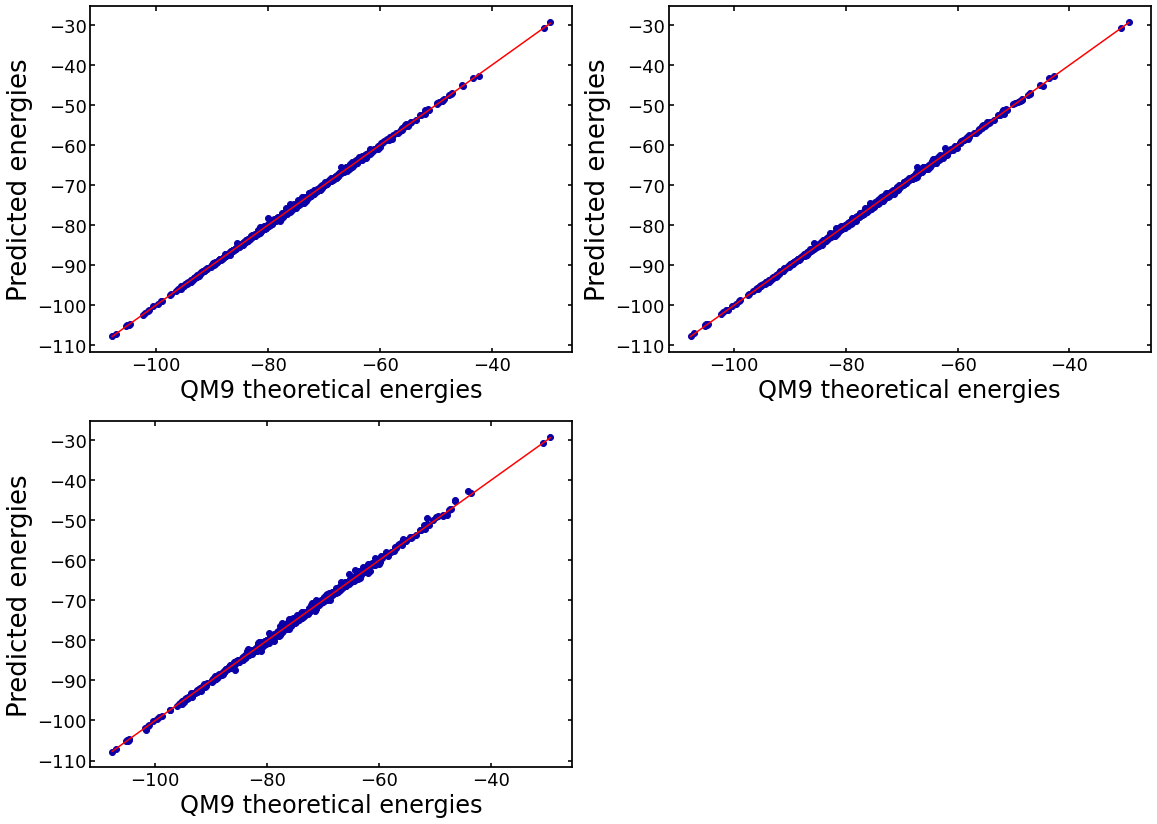

In [26]:
fig = plt.figure(figsize=(19,14))

filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/6nn-2gcl-*fcl-*prediction.csv')
# print(filename[0])
nfiles = len(filename)
# print(nfiles)
MAE2 = np.zeros(nfiles, dtype=float)

for n in range(1,1+nfiles):

    index = '22' + repr(n)
    ax = fig.add_subplot(int(index))

    #design
    ax.spines['left'].set_linewidth(1.75)
    ax.spines['right'].set_linewidth(1.75)
    ax.spines['top'].set_linewidth(1.75)
    ax.spines['bottom'].set_linewidth(1.75)

    ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.6, length=4.5)

    ax.set_ylabel(r'Predicted energies', fontdict = {'fontsize':26, 'color':'k'})
    ax.set_xlabel(r'QM9 theoretical energies', fontdict = {'fontsize':24, 'color':'k'})

    ## data processing ##
    p = []
    e = []
    
    data = pd.read_csv(filename[int(n-1)], header=None)
    ndata = np.shape(data)

    for i in range (1, ndata[0]):

        p.append(data[1][i])
        e.append(data[0][i])

    prediction = np.array(p,dtype=float)
    exact = np.array(e,dtype=float)

    eMax = np.max(exact)
    eMin = np.min(exact)
    x = np.linspace(eMin, eMax, 100)

    ax.scatter(exact, prediction, color = '#0B00A8', label="Model predictions")
    ax.plot(x, x, color = 'red', label="Exact")
    
    MAE2[n-1] = mae(exact, prediction)
    print('MAE2 (2, ' + repr(n) + ')= ', MAE2[n-1])
    print(filename[int(n-1)])
    
plt.show()
# plt.savefig('fig_prediction_fcl_def.pdf',bbox_inches='tight')

[0.20691905 0.16699363 0.19258175]
[0.17887475 0.16699363 0.28976616]


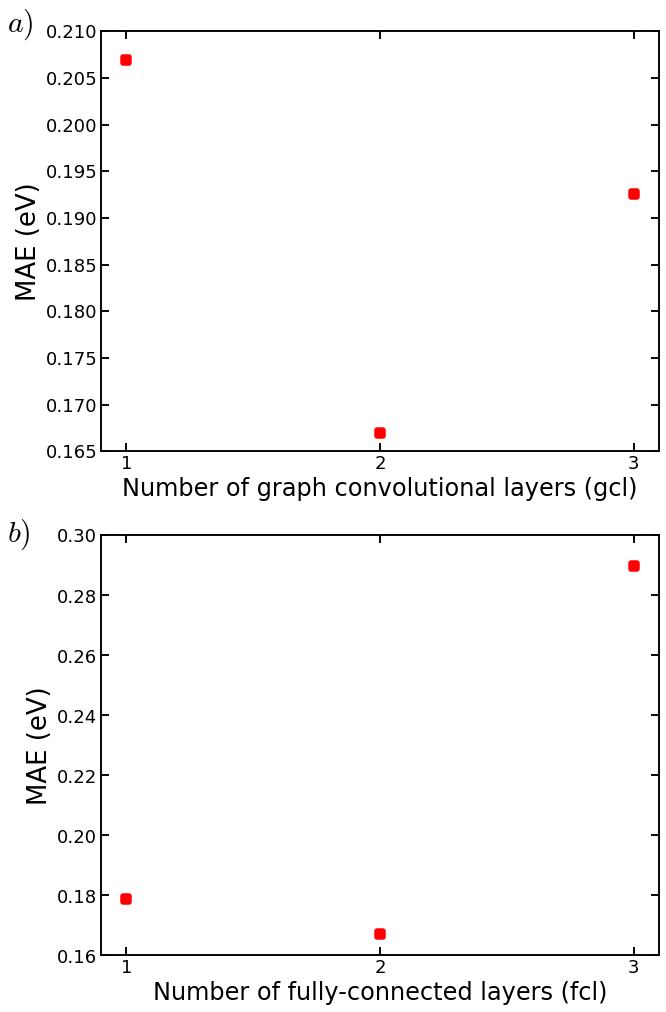

In [33]:
fig = plt.figure(figsize=(10,17))

x = np.linspace(1, 3, 3)
print(MAE)

ax = fig.add_subplot(211)
ax.scatter(x, MAE, color = 'red', marker="s", linewidth=5.5, label="Model predictions")

## design ##
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)

ax.set_ylabel(r'MAE (eV)', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'Number of graph convolutional layers (gcl)', fontdict = {'fontsize':24, 'color':'k'})
plt.text(0.53, 0.210, r'$a)$', fontsize=30)

# ax.set_xlim([0,120])
ax.set_ylim([0.165,0.210])
ax.set_xticks(np.arange(1,1+nfiles))


x = np.linspace(1, 3, 3)
print(MAE2)

ax = fig.add_subplot(212)
ax.scatter(x, MAE2, color = 'red', marker="s", linewidth=5.5, label="Model predictions")

## design ##
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)

ax.set_ylabel(r'MAE (eV)', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'Number of fully-connected layers (fcl)', fontdict = {'fontsize':24, 'color':'k'})

# ax.set_xlim([0,120])
ax.set_ylim([0.160,0.300])
# ax.set_xticks(np.arange(1,6,1))  
ax.set_xticks(np.arange(1,1+nfiles)) 

# plt.legend(bbox_to_anchor=(0.05,0.93), loc='upper left', fontsize=19, borderaxespad=0.)
plt.text(0.53, 0.298, r'$b)$', fontsize=30)

plt.show()
# plt.savefig('Hyperparameters_MAE_gcl_fcl.pdf',bbox_inches='tight')

[0.2057674  0.20700311 0.3116427  0.18991004]


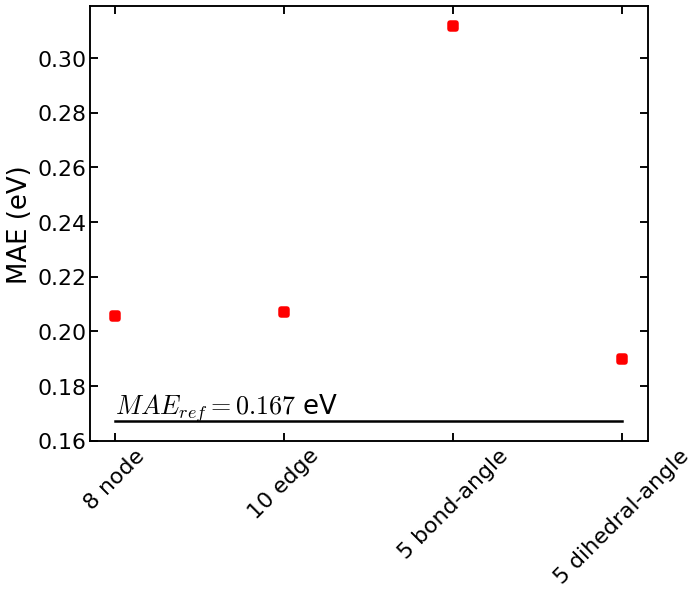

In [10]:
#representation
fig, ax = plt.subplots()

x = np.linspace(1, 4, 4)
print(MAE)

ax.scatter(x, MAE, color = 'red', marker="s", linewidth=5.5, label="Model predictions")
ax.plot([1,4], [0.166993625164032,0.166993625164032], color='black', linewidth=2.5, linestyle='solid')

## design ##
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)

ax.set_ylabel(r'MAE (eV)', fontdict = {'fontsize':26, 'color':'k'})
plt.text(1, 0.17, "$MAE_{ref}=0.167$ eV", fontsize=26, color = 'black')
 

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xticks([1.0, 2.0, 3.0, 4.0], ['8 node', '10 edge', '5 bond-angle', '5 dihedral-angle'], rotation = 45 )

plt.show()
# plt.savefig('Hyperparameters_MAE_features.pdf',bbox_inches='tight')

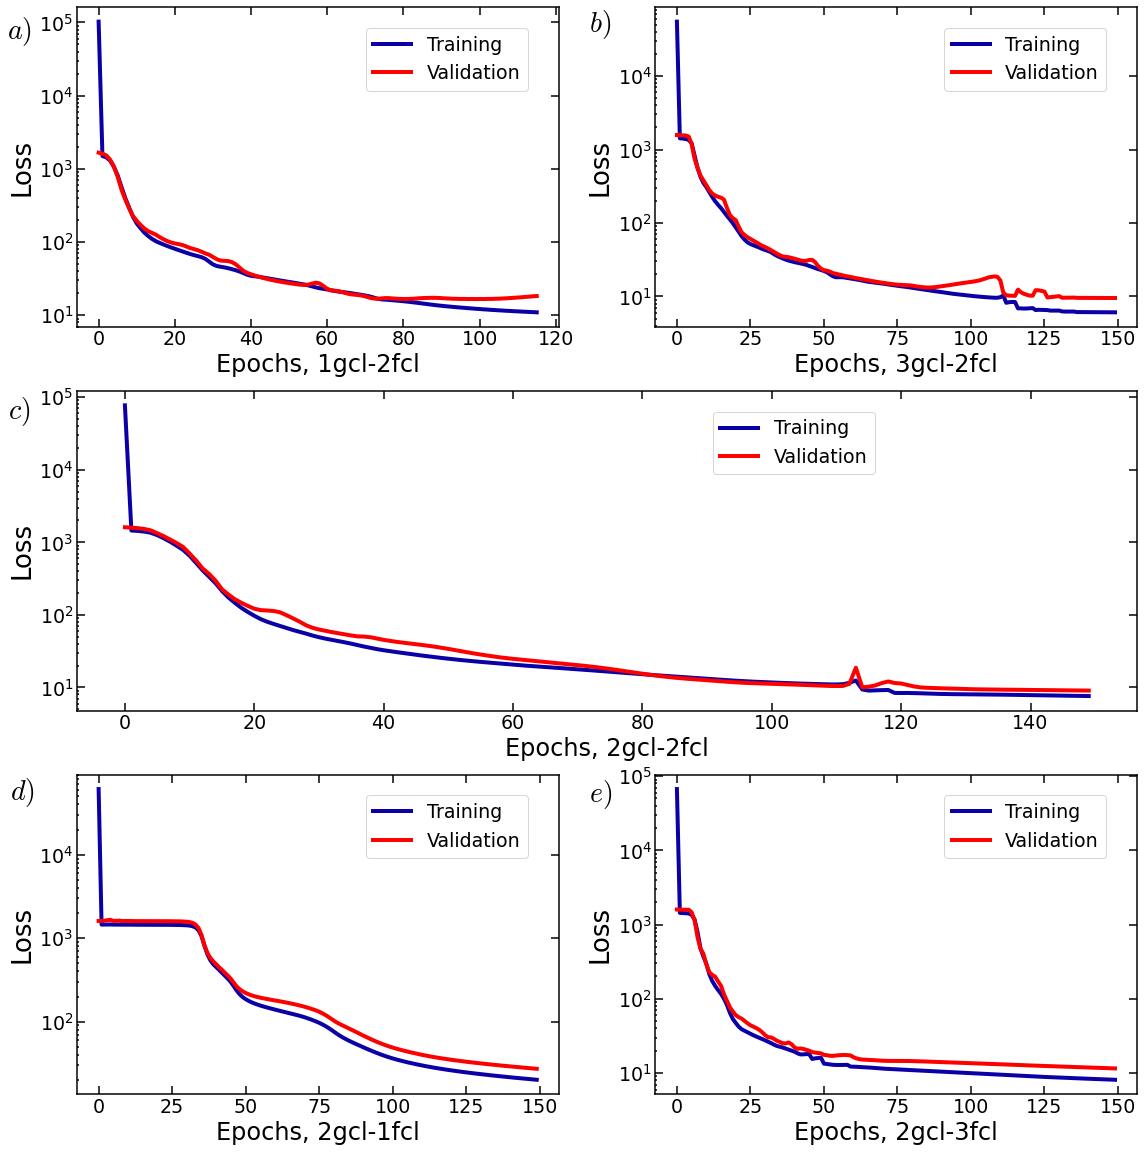

In [11]:
fig = plt.figure(figsize=(19,20))


# filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs_iniciales/loss-2gcl-*fcl.csv')
filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/loss-*gcl-*fcl.csv')
# print(filename[0])
nfiles = len(filename)

####PRIMERO#####
ax = fig.add_subplot(321)

## design ##
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.5, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.5, length=2.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'Epochs, 1gcl-2fcl', fontdict = {'fontsize':24, 'color':'k'})

ax.set_yscale("log")
#     locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.arange(1,10,1),numticks=1) #subs=(0.2,0.4,0.6,0.8),
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## data processing ##
epoch = []
train = []
val = []


data = pd.read_csv(filename[0], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=19, borderaxespad=0.)
plt.text(-24, 60000, r'$a)$', fontsize=28)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


#####SEGUNDO#####
ax = fig.add_subplot(322)

## design ##
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.5, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.5, length=2.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'Epochs, 3gcl-2fcl', fontdict = {'fontsize':24, 'color':'k'})

ax.set_yscale("log")
#     locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.arange(1,10,1),numticks=1) #subs=(0.2,0.4,0.6,0.8),
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## data processing ##
epoch = []
train = []
val = []


data = pd.read_csv(filename[2], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=19, borderaxespad=0.)
plt.text(-30, 40000, r'$b)$', fontsize=28, fontweight='regular')
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


####TERCERO####
ax = fig.add_subplot(312)

## design ##
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.5, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.5, length=2.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'Epochs, 2gcl-2fcl', fontdict = {'fontsize':24, 'color':'k'})

ax.set_yscale("log")
#     locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.arange(1,10,1),numticks=1) #subs=(0.2,0.4,0.6,0.8),
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## data processing ##
epoch = []
train = []
val = []


data = pd.read_csv(filename[1], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=19, borderaxespad=0.)
plt.text(-18, 50000, r'$c)$', fontsize=28)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


####CUARTO#####
ax = fig.add_subplot(325)

## design ##
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.5, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.5, length=2.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'Epochs, 2gcl-1fcl', fontdict = {'fontsize':24, 'color':'k'})

ax.set_yscale("log")
#     locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.arange(1,10,1),numticks=1) #subs=(0.2,0.4,0.6,0.8),
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## data processing ##
epoch = []
train = []
val = []


data = pd.read_csv(filename[3], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=19, borderaxespad=0.)
plt.text(-30, 45000, r'$d)$', fontsize=28, fontweight='regular')
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


####QUINTO####
ax = fig.add_subplot(326)

## design ##
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.5, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.5, length=2.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'Epochs, 2gcl-3fcl', fontdict = {'fontsize':24, 'color':'k'})

ax.set_yscale("log")
#     locmin = matplotlib.ticker.LogLocator(base=10.0,subs=np.arange(1,10,1),numticks=1) #subs=(0.2,0.4,0.6,0.8),
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## data processing ##
epoch = []
train = []
val = []


data = pd.read_csv(filename[4], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=19, borderaxespad=0.)
plt.text(-30, 45000, r'$e)$', fontsize=28, fontweight='regular')
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)

plt.show()
# plt.savefig('Hyperparameters_5.pdf',bbox_inches='tight')

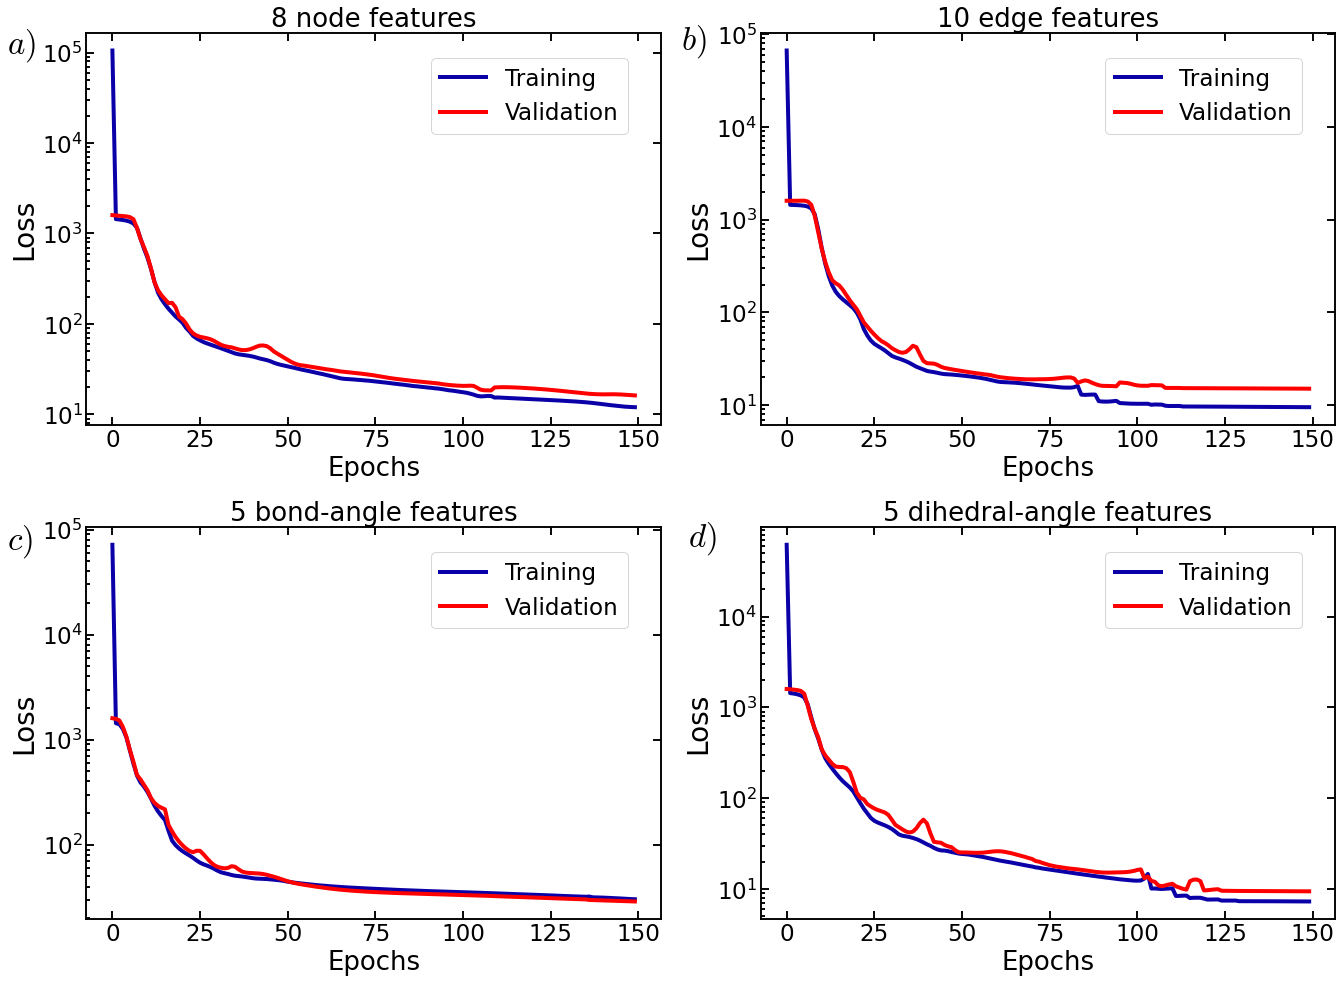

In [11]:
fig = plt.figure(figsize=(19,14))


# filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/loss-*gcl-*fcl.csv')
filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/*_loss*.csv')
# print(filename[0])
nfiles = len(filename)

####1-2#####
ax = fig.add_subplot(221)

## design ##
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.9, length=4.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':28, 'color':'k'})
ax.set_xlabel(r'Epochs', fontdict = {'fontsize':26, 'color':'k'})
# ax.set_title(r'1gcl-2fcl', fontdict = {'fontsize':26, 'color':'k'})
ax.set_title(r'8 node features', fontdict = {'fontsize':26, 'color':'k'})

ax.set_yscale("log")

## data processing ##
epoch = []
train = []
val = []

data = pd.read_csv(filename[0], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

ax.set_xticks(np.arange(0,151,25))

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=23, borderaxespad=0.)
plt.text(-30, 100000, r'$a)$', fontsize=33)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)



#####3-2#####
ax = fig.add_subplot(222)

## design ##
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.9, length=4.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':28, 'color':'k'})
ax.set_xlabel(r'Epochs', fontdict = {'fontsize':26, 'color':'k'})
# ax.set_title(r'3gcl-2fcl', fontdict = {'fontsize':26, 'color':'k'})
ax.set_title(r'10 edge features', fontdict = {'fontsize':26, 'color':'k'})

ax.set_xticks(np.arange(0,151,25))  

ax.set_yscale("log")

## data processing ##
epoch = []
train = []
val = []

data = pd.read_csv(filename[1], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=23, borderaxespad=0.)
plt.text(-30, 70000, r'$b)$', fontsize=33)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)

####2-1#####
ax = fig.add_subplot(223)

## design ##
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.9, length=4.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':28, 'color':'k'})
ax.set_xlabel(r'Epochs', fontdict = {'fontsize':26, 'color':'k'})
# ax.set_title(r'2gcl-1fcl', fontdict = {'fontsize':26, 'color':'k'})
ax.set_title(r'5 bond-angle features', fontdict = {'fontsize':26, 'color':'k'})

ax.set_xticks(np.arange(0,151,25))  

ax.set_yscale("log")

## data processing ##
epoch = []
train = []
val = []

data = pd.read_csv(filename[2], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=23, borderaxespad=0.)
plt.text(-30, 65000, r'$c)$', fontsize=33)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)


####2-3####
ax = fig.add_subplot(224)

## design ##
ax.spines['left'].set_linewidth(1.9)
ax.spines['right'].set_linewidth(1.9)
ax.spines['top'].set_linewidth(1.9)
ax.spines['bottom'].set_linewidth(1.9)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.9, length=8)
ax.tick_params(axis='y', which='minor', direction="in", width=1.9, length=4.)

ax.set_ylabel(r'Loss', fontdict = {'fontsize':28, 'color':'k'})
ax.set_xlabel(r'Epochs', fontdict = {'fontsize':26, 'color':'k'})
# ax.set_title(r'2gcl-3fcl', fontdict = {'fontsize':26, 'color':'k'})
ax.set_title(r'5 dihedral-angle features', fontdict = {'fontsize':26, 'color':'k'})

ax.set_xticks(np.arange(0,151,25))  

ax.set_yscale("log")

## data processing ##
epoch = []
train = []
val = []

data = pd.read_csv(filename[3], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    epoch.append(data[0][i])
    train.append(data[1][i])
    val.append(data[2][i])

epoch = np.array(epoch,dtype=float)
train = np.array(train,dtype=float)
val = np.array(val,dtype=float)

ax.plot(epoch, train, color = '#0B00A8', linewidth=4., label='Training')
ax.plot(epoch, val, color = 'red', linewidth=4., label='Validation')

plt.legend(bbox_to_anchor=(0.60,0.935), loc='upper left', fontsize=23, borderaxespad=0.)
plt.text(-28, 60000, r'$d)$', fontsize=33, fontweight='regular')
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)


fig.tight_layout()
plt.show()
# plt.savefig('Hyperparameters_loss_features_4.pdf',bbox_inches='tight')

MAE (1,2)=  0.2069190526008606
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-1gcl-2fcl-10082022-111342prediction.csv
MAE (3,2)=  0.19258174657821656
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-3gcl-2fcl-07082022-104057prediction.csv
MAE (2,1)=  0.1788747477531433
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-2gcl-1fcl-14082022-102533prediction.csv
MAE (2,3)=  0.2897661590576172
C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs\6nn-2gcl-3fcl-16082022-045559prediction.csv


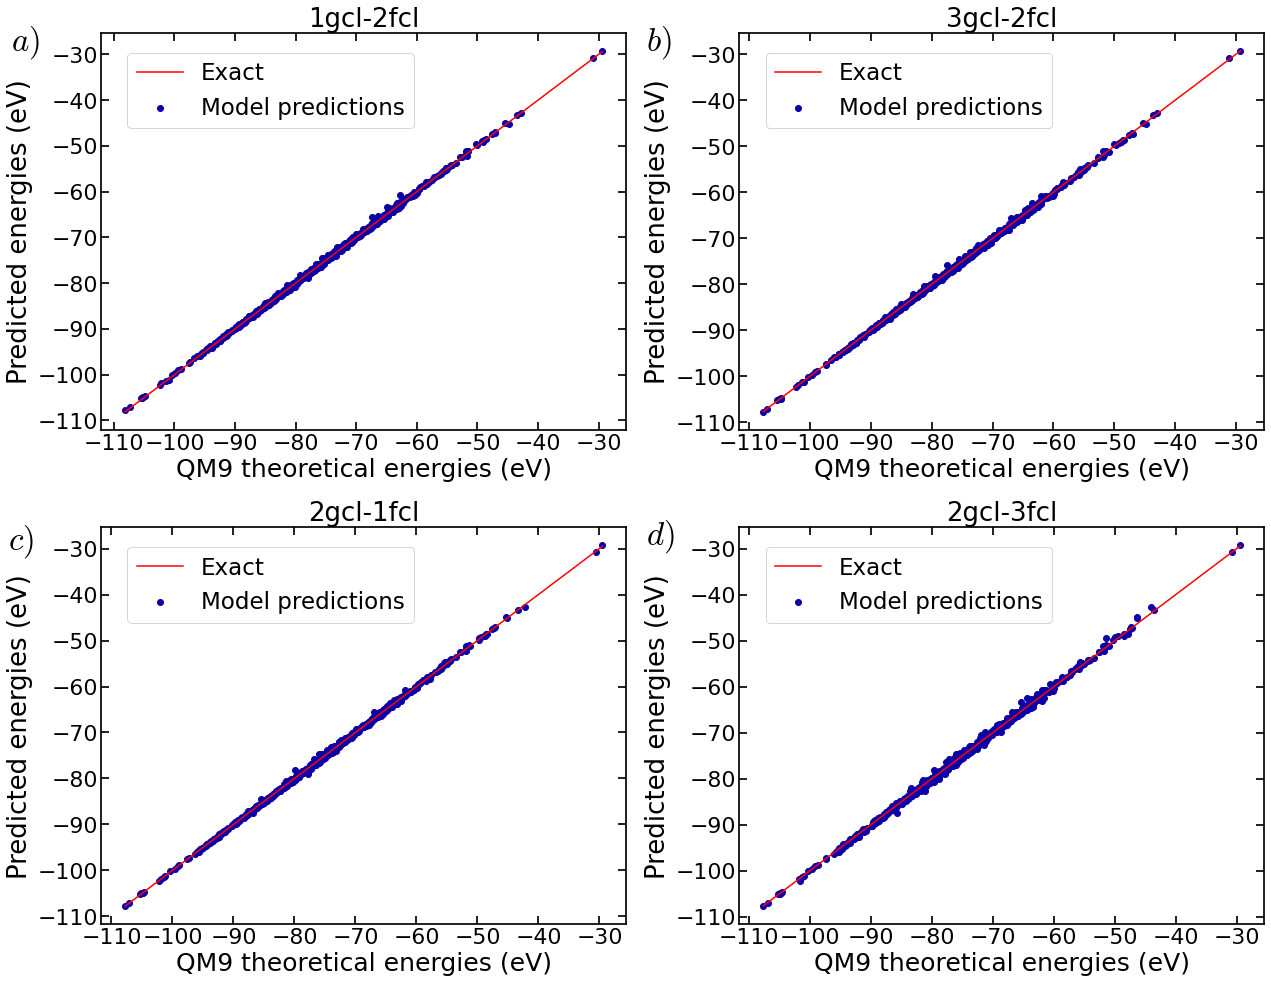

In [17]:
fig = plt.figure(figsize=(18,14))

filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/6nn-*gcl-*fcl-*prediction.csv')
# filename = glob.glob('C:/Users/Portatil/Documents/Master/TFM/Trabajo/runs/*-6nn-2gcl-2fcl-*prediction2.csv')
# print(filename[0])
nfiles = len(filename)
# print(nfiles)


####1-2#####
ax = fig.add_subplot(221)

#design
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_linewidth(1.7)
ax.spines['bottom'].set_linewidth(1.7)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.7, length=8)

ax.set_ylabel(r'Predicted energies (eV)', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'QM9 theoretical energies (eV)', fontdict = {'fontsize':25, 'color':'k'})
ax.set_title(r'1gcl-2fcl', fontdict = {'fontsize':26, 'color':'k'})
# ax.set_title(r'8 node features', fontdict = {'fontsize':26, 'color':'k'})

## data processing ##
p = []
e = []

data = pd.read_csv(filename[0], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    p.append(data[1][i])
    e.append(data[0][i])

prediction = np.array(p,dtype=float)
exact = np.array(e,dtype=float)

eMax = np.max(exact)
eMin = np.min(exact)
x = np.linspace(eMin, eMax, 100)

ax.scatter(exact, prediction, color = '#0B00A8', label="Model predictions")
ax.plot(x, x, color = 'red', label="Exact")

plt.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', fontsize=23, borderaxespad=0.)
plt.text(-127, -29, r'$a)$', fontsize=33)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
ax.set_xticks(np.arange(-110,-29,10)) 

MAE = mae(exact, prediction)
print('MAE (1,2)= ',MAE)
print(filename[0])
    
    
#####3-2#####
ax = fig.add_subplot(222)
    
#design
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_linewidth(1.7)
ax.spines['bottom'].set_linewidth(1.7)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.7, length=8)

ax.set_ylabel(r'Predicted energies (eV)', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'QM9 theoretical energies (eV)', fontdict = {'fontsize':25, 'color':'k'})
ax.set_title(r'3gcl-2fcl', fontdict = {'fontsize':26, 'color':'k'})
# ax.set_title(r'10 edge features', fontdict = {'fontsize':26, 'color':'k'})

## data processing ##
p = []
e = []

data = pd.read_csv(filename[4], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    p.append(data[1][i])
    e.append(data[0][i])

prediction = np.array(p,dtype=float)
exact = np.array(e,dtype=float)

eMax = np.max(exact)
eMin = np.min(exact)
x = np.linspace(eMin, eMax, 100)

ax.scatter(exact, prediction, color = '#0B00A8', label="Model predictions")
ax.plot(x, x, color = 'red', label="Exact")

plt.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', fontsize=23, borderaxespad=0.)
plt.text(-127, -29, r'$b)$', fontsize=33)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
ax.set_xticks(np.arange(-110,-29,10)) 

MAE = mae(exact, prediction)
print('MAE (3,2)= ',MAE)
print(filename[4])

####2-1#####
ax = fig.add_subplot(223)

#design
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_linewidth(1.7)
ax.spines['bottom'].set_linewidth(1.7)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.7, length=8)

ax.set_ylabel(r'Predicted energies (eV)', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'QM9 theoretical energies (eV)', fontdict = {'fontsize':25, 'color':'k'})
ax.set_title(r'2gcl-1fcl', fontdict = {'fontsize':26, 'color':'k'})
# ax.set_title(r'5 bond-angle features', fontdict = {'fontsize':26, 'color':'k'})

## data processing ##
p = []
e = []

data = pd.read_csv(filename[1], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    p.append(data[1][i])
    e.append(data[0][i])

prediction = np.array(p,dtype=float)
exact = np.array(e,dtype=float)

eMax = np.max(exact)
eMin = np.min(exact)
x = np.linspace(eMin, eMax, 100)

ax.scatter(exact, prediction, color = '#0B00A8', label="Model predictions")
ax.plot(x, x, color = 'red', label="Exact")

plt.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', fontsize=23, borderaxespad=0.)
plt.text(-127, -30, r'$c)$', fontsize=33)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
ax.set_xticks(np.arange(-110,-29,10)) 

MAE = mae(exact, prediction)
print('MAE (2,1)= ',MAE)
print(filename[1])


####2-3####
ax = fig.add_subplot(224)

#design
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_linewidth(1.7)
ax.spines['bottom'].set_linewidth(1.7)

ax.tick_params(top = True, right=True, bottom = True, direction="in", width=1.7, length=8)

ax.set_ylabel(r'Predicted energies (eV)', fontdict = {'fontsize':26, 'color':'k'})
ax.set_xlabel(r'QM9 theoretical energies (eV)', fontdict = {'fontsize':25, 'color':'k'})
ax.set_title(r'2gcl-3fcl', fontdict = {'fontsize':26, 'color':'k'})
# ax.set_title(r'5 dihedral-angle features', fontdict = {'fontsize':26, 'color':'k'})

## data processing ##
p = []
e = []

data = pd.read_csv(filename[3], header=None)
ndata = np.shape(data)

for i in range (1, ndata[0]):

    p.append(data[1][i])
    e.append(data[0][i])

prediction = np.array(p,dtype=float)
exact = np.array(e,dtype=float)

eMax = np.max(exact)
eMin = np.min(exact)
x = np.linspace(eMin, eMax, 100)

ax.scatter(exact, prediction, color = '#0B00A8', label="Model predictions")
ax.plot(x, x, color = 'red', label="Exact")

plt.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', fontsize=23, borderaxespad=0.)
plt.text(-127, -29, r'$d)$', fontsize=33, fontweight='regular')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
ax.set_xticks(np.arange(-110,-29,10)) 

MAE = mae(exact, prediction)
print('MAE (2,3)= ',MAE)
print(filename[3])

fig.tight_layout()
plt.show()
# plt.savefig('Hyperparameters_energy_4.pdf',bbox_inches='tight')